# Assignment 1 - Image Processing

University of Puerto Rico, Río Piedras    
Rémi Mégret, Introduction to Computer Vision    
Nov 2017

__Submitted by: Tatiana Castro Vélez

In [2]:
# Global imports
%matplotlib inline
import skimage
from skimage import data, io, color, filters, measure, feature
import matplotlib.pyplot as plt
import skdemo
from skimage import transform
from numpy import flip
from skimage import morphology
from skimage import filters
import skimage.filters as filters
from skimage import measure
from skimage import data
import numpy as np
from matplotlib import pyplot as plt, cm

## Part A. Theoretical questions

__Q1.__ Give 3 practical applications of Computer Vision

Practical application of Computer Vision: 
1. Classification of images
2. Facial Recognition 
3. Augmented Reality

__Q2.__ How is Computer Vision different from Computer Graphics?

Computer Vision is the analysis, extraction and understanding of an image or colection of images. Whereas Computer Graphics is the creation and design of pictures, drawing, charts etc. using the computer with help of programming. The distinction is that on take a photo and does analysis on it to obtain information of the image (Computer Vision) and the other creates the image using programming (Computer Graphics). 

__Q3.__ In a scalar image, 0 is always black. Yes/No? Explain.

Yes, in a scalar image the 0 is always black. A scalar image is single channel and has one value per pixel. 

__Q4.__ Memory use

We want to process RGB color images in HD format (size 1920x1080 pixels) on a Rasberry Pi. The Pi has 1GB of memory, but since we also need to run other programs in parallel, we only have 80MB of RAM available for image processing.

We need 1 image as input and 1 as output.
1. If we process everything as 8 bits `uint8` images, do the input and output images fit in memory?
2. Some processing require floating point images. We decide to use 64 bits `double` images. Show they do not fit in available memory.
3. Propose solution(s)

Because we have 8 bit images, which is the same as 1 byte, and the range of colors in each component is 1 byte. To obtain the memory we have to multiply thos pixels by the three components of colot and the sixe of the bytes in each component. (((1920 x 1080)x 3) x 1) = 6,220,800. Because we have an input image and out image, we have 6,220,800 x 2 = 12,441,600. So we know that the images fit in the memory given. When we have 64 bit images, there are 8 bytes (((1920 x 1080) x 3) x 8)= 49,766,400. Because we have an input image and out image, we have 49,766,400 x 2 = 99,532,800. So we know that the images do not fit in the memory given. Solutions: Process the image in another color space that is not require 3 channels. 

__Q5.__ When filtering with a Gaussian filter...
... the output image looks (check all that apply)

a) Noise:  		[X] less noisy	[=] as noisy	[+] more noisy

b) Blur:		[-] less blur	[=] same blur 	[X] more blur	

c) Luminance: 	[-] darker	[=] same	[X] brighter

## Part B. Drills

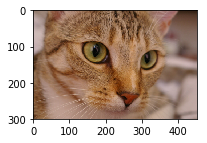

In [3]:
fig = plt.figure(figsize=(4,2))
image = skimage.data.chelsea()
plt.imshow(image);

__Q1.__ What is the size of `image`, and its depth?

In [4]:
print("Shape: ", image.shape)

Shape:  (300, 451, 3)


Your answer: width = 451, height = 300, depth = 3

__Q2.__ What data type (uint8, float...) is `image`?

In [5]:
print("Data type: ", image.dtype)

Data type:  uint8


__Q3.__ Extract and display a 100x100 image centered on one of the eyes of the cat.

/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Shape:  (100, 100, 3)


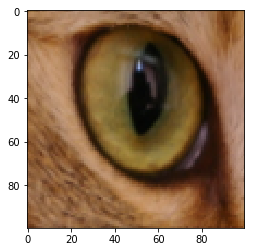

In [72]:
image1=image[80:165,110:225];
image1 = transform.resize(image1, [100,100]);
print("Shape: ", image1.shape);
plt.imshow(image1);

__Q4.__ Using slicing operations, mirror `image` by inverting left and right.

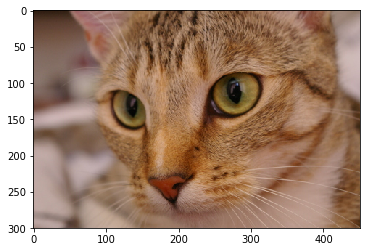

In [7]:
image_new = image.copy()
image_new = image_new[:,::-1]
plt.imshow((image_new));

__Q5.__ Create a new image by adding borders of 100 pixels all around `image`. The border should be a light color (pink, light blue, light green...)

(300, 451, 3)


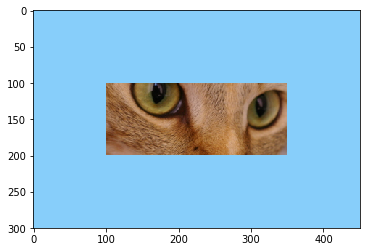

In [8]:
image_new = image.copy()
print(image.shape)
image_new[0:,:100]=[135,206,250]
image_new[0:100,0:]=[135,206,250]
image_new[0:,351:]=[135,206,250]
image_new[200:,0:]=[135,206,250]
plt.imshow(image_new);

## Part C. Problems

### P1. Color segmentation

In robocup http://www.robocup.org/leagues/7, the ball and the robot players can be detected and tracked using color segmentation.
Using the image below, we want to:
- segment the orange ball (generate a binary mask of the ball)
- segment each robot (generate a binary mask of the robots)

Using the mask, we want to compute the center of each object and display is as a set of crosses overlaid on top of the image. The algorithm should treat the ball and the robot separately so that we know which is which.

Hints: converting to Lab, HSV or Yuv color spaces should help finding good thresholds for segmentation.

12.6632889847
0.337890625


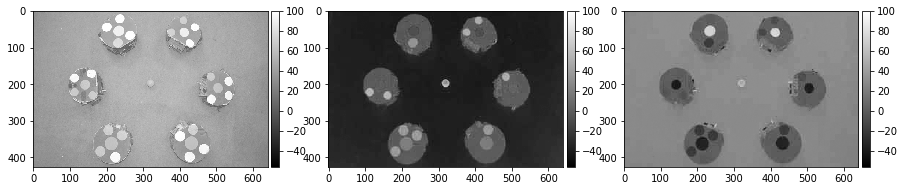

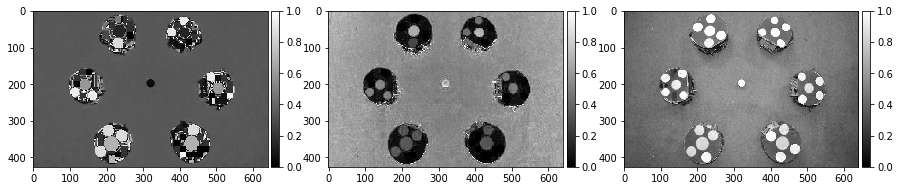

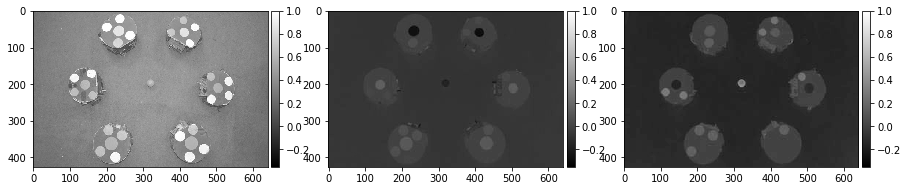

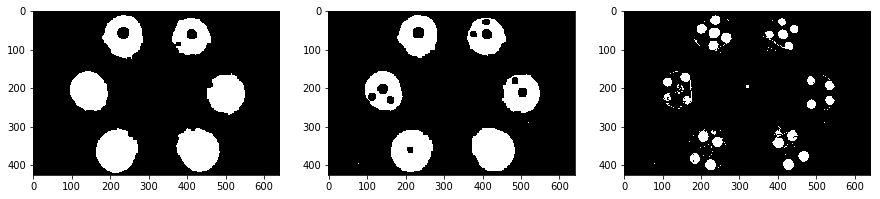

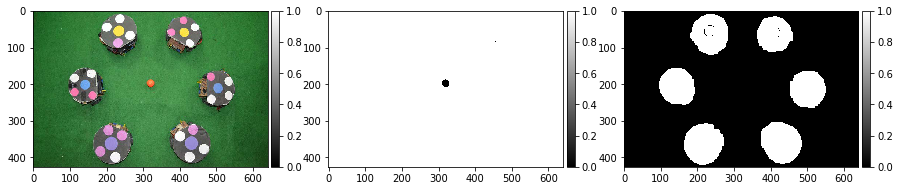

In [65]:
# Image source: http://marvinproject.sourceforge.net/en/examples/robocupSegmentation.html
from skimage import morphology
sq = morphology.square(width=10)

robocup = io.imread('images/robocup.jpg')
lab = color.rgb2lab(robocup)
hsv = color.rgb2hsv(robocup)
yuv = color.rgb2yuv(robocup)

skdemo.imshow_all(lab[...,0], lab[...,1], lab[...,2])
skdemo.colorbars()

skdemo.imshow_all(hsv[...,0], hsv[...,1], hsv[...,2])
skdemo.colorbars()

skdemo.imshow_all(yuv[...,0], yuv[...,1], yuv[...,2])
skdemo.colorbars()

threshold = filters.threshold_otsu(lab[...,2])
print(threshold)
threshold1 = filters.threshold_otsu(hsv[...,1])
print(threshold1)

mask_ball1 = (lab[...,1]<18) 
mask_ball2 = (lab[...,2]<25) 

mask_robot_1 = (lab[...,2]<threshold)
mask_robot_2 = (hsv[...,1]<threshold1)
mask_robot_3 = (yuv[...,0]>.635)

mask_ball= mask_ball1 + mask_ball2

mask_robot_1 = morphology.closing(mask_robot_1, sq)
mask_robot_2 = morphology.closing(mask_robot_2, sq)

mask_robot_n= mask_robot_1 + mask_robot_2 + mask_robot_3

mask_robot = morphology.opening(mask_robot_1, sq)

skdemo.imshow_all(mask_robot_1, mask_robot_2, mask_robot_3);

mask_robot = morphology.opening(mask_robot_n, sq)

skdemo.imshow_all(robocup, mask_ball, mask_robot);
skdemo.colorbars()

__Computing segmentation mask__

You explanation here: what is your approach? how did you decide which thresholds to use?

To begin the exercise, I plotted the image in LAB, HSV and YUV color space with their respective color bars. As soon as I viewed the six images, I could make a more informed assumption as to which image and interval should I choose to obtain a correct segmentation.

For the ball, 
I could see clearly that the images that could be the best for my segmentation would be in the LAB color space figure 1 and 2. Figure 1 would be useful because I could see clearly my ball but since the center ball had basically the same color as some of the balls of the robot I had to use the other image to erase the parts I did not want. And that is what my LAB figure 2 was used for. Combining the two helped obtain the center ball alone. 

For the robots,
I could see clearly that an optimal image for the segmentation of the images would be HSV figure 1. The problem I encountered with this image was the noise that it came with surrounding the circle and that some of the balls in the robots were too white for the segmentation. Because of this, I decided that I needed the help of another image to help create a more clear segmentation. Because of this, I used the other image that was optimal for segmentation YUV figure 1. But it had the same problem as HSV figure 1. There was a lot of noise surrounding the circle.But the combination of both of the images created an fairly good segmentation for the robots. The problem with this mask is that I had two of the balls in the robots so I seeked the help of another image so I could eliminate it. Because of this noise, I decided to use morphology specifically opening which is erosion and then dilation which took care of the noise a bit with the final image and closing in the individual images. 

__Computing and displaying object centers__

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


2


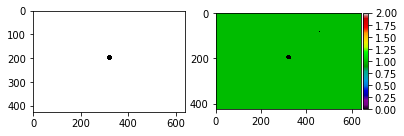

In [10]:
label_image = measure.label(mask_ball)

fig,axes = plt.subplots(1,2)
axes[0].imshow(mask_ball, cmap='gray')
axes[1].imshow(label_image, cmap='spectral')
skdemo.colorbars(axes[1])

print(np.max(label_image))

Here we let the function label detect the different objects in the image. In the second image, you can see the segmentation created by the function. Green represents the background, and black the ball.

[-50, 690, 476, -50]

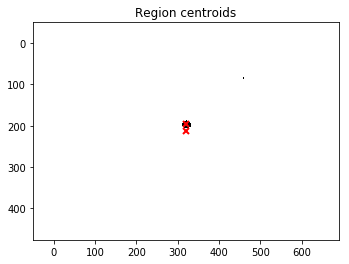

In [11]:
props = measure.regionprops(label_image)
centroids = np.array( [prop.centroid for prop in props] )

plt.imshow(mask_ball, cmap='gray')
plt.plot(centroids[:,1],centroids[:,0],'xr',markeredgewidth=2)
plt.title('Region centroids')
plt.axis([-50,mask_ball.shape[1]+50,mask_ball.shape[0]+50,-50])

The functions here help calculate and illustrate the center of the object using the segmentation previously showed. 

6


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


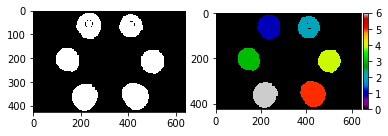

In [66]:
label_image = measure.label(mask_robot)

fig,axes = plt.subplots(1,2)
axes[0].imshow(mask_robot, cmap='gray')
axes[1].imshow(label_image, cmap='spectral')
skdemo.colorbars(axes[1])

print(np.max(label_image))

Here we let the function label detect the different objects in the image. In the second image, you can see the segmentation created by the function. You can see that each of the robots have their own color (yellow, orange, blue, purple,...). But you can see that because of the noise, the some of the edges of the robots have different colors which is a problem when calculating the center of the robots.

[-50, 690, 476, -50]

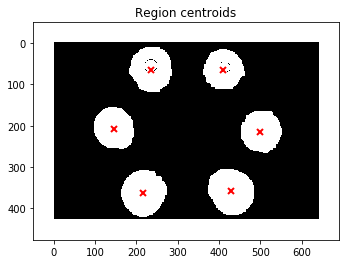

In [67]:
props = measure.regionprops(label_image)
centroids = np.array( [prop.centroid for prop in props] )

plt.imshow(mask_robot, cmap='gray')
plt.plot(centroids[:,1],centroids[:,0],'xr',markeredgewidth=2)
plt.title('Region centroids')
plt.axis([-50,mask_robot.shape[1]+50,mask_robot.shape[0]+50,-50])

The functions here help calculate and illustrate the center of the object using the segmentation previously showed. As I previously stated, the production of the centers is excessive because of the labeling of the image that is incorrect because of all the noise surrounding the image. 

### P2. Segmenting noisy images

The following image represents nanoparticles observed using electron microscopy. Due to the scale at which we capture them, there is a lot of noise.

You objective is to segment the particles as best as you can by using a combination of
- thresholding
- filtering (gaussian, average, median, morphology...)

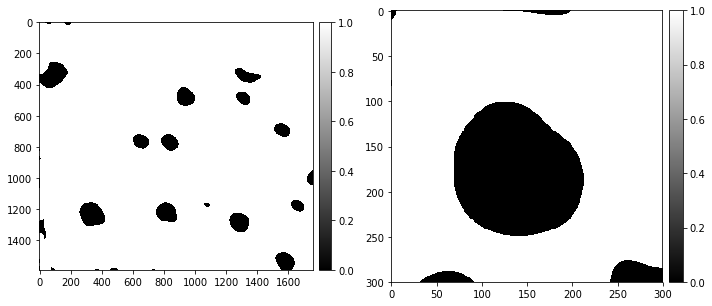

In [75]:
particles0 = io.imread('images/img_Hour_00_Minute_00_Second_30_Frame_0000.jpg')
particles = particles0[300:600, 800:1100]

sigma = 20
beta = 20
smooth = filters.gaussian(particles0, sigma)
smooth_1 = filters.gaussian(particles, beta)

threshold = filters.threshold_otsu(smooth)

threshold1 = filters.threshold_otsu(smooth_1)

thresholdn1 = filters.threshold_otsu(smooth) #my threshold: mitad del histogram
thresholdn2 = .5 #my threshold: mitad del histogram

fig, axes = plt.subplots(1,2,figsize=(10,8))

#axes[0].imshow(particles0)
#axes[1].imshow(particles)

axes[0].imshow(smooth>thresholdn1)
axes[1].imshow(smooth_1>thresholdn2)


skdemo.colorbars(); plt.tight_layout()

This image is not obvious to segment because the histogram does not have separate modes for the particles (slightly darker) and the background (slightly lighter). The noise is just mixing the gray-levels of both.

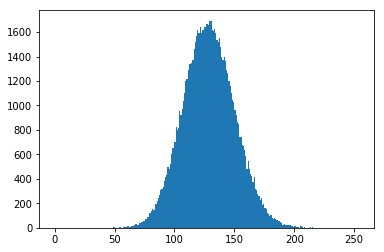

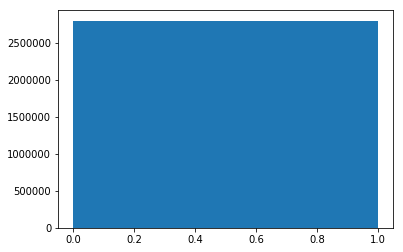

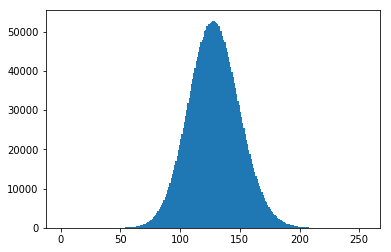

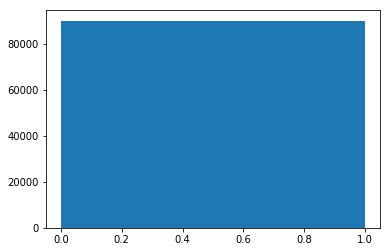

In [19]:
plt.hist(particles.ravel(),range(0,255));
plt.figure()
plt.hist(smooth.ravel(),range(0,2));
plt.figure()
plt.hist(particles0.ravel(),range(0,256));
plt.figure()
plt.hist(smooth_1.ravel(),range(0,2));

Your explanations here: what is your approach to segment the particles?

Firstly, I decided to get rid of the noise by filtering the images with the gaussian filter. I used my sigma (standar deviation) which defines the sizes of the neighborhood by checking what kind of blur would be the best for my segmentation. I wanted it to eliminate the noise and see clearly the difference in color of the cells and the background. After I filtered the image, I plotted the histogram and took the half of the histogram that would be 0.5. To verify my threshold, I used the function that calculates the best threshold for the image and applied it. This  resulted in the segmentation of the cells without any noise. 